In [81]:
import pandas as pd
df = pd.read_csv("NEW_Keywords_credit.csv")
df

,index,selftext,num_comments,score,title,type
0,18,What’s credit?3.,1.0,1,"All right, so I got a few questions...",Adult
1,23,"Gonna make this short and sweet, my medical bi...",0.0,1,"Loans and credit cards, what to expect?",Adult
2,30,)How to I prepare for paying for property?How ...,1.0,1,19 year old trying to gain my independence,Adult
3,81,Can I cancel the whole agreement as I haven’t ...,2.0,4,First time big spend,Adult
4,83,I spent a bit of time working in a call center...,0.0,1,[101] Some (generally) unknown things that hap...,Adult
...,...,...,...,...,...,...
5989,4932,So I live with my mom which every day seems wo...,5.0,1,What do I need to do to move out,Adult
5990,5204,I was like I wanna move out soon how can I get...,0.0,1,I found out I have a credit score when I thoug...,Adult
5991,5383,This isn't like the online course I thought I ...,6.0,1,Does being in an online class for only 5 days ...,Adult
5992,5424,I already blocked my credit card just in case ...,2.0,1,So today I probably got robbed,Adult


In [82]:
import re
def remove_other(x):
    x = re.sub("\$"," ", x) #remove $
    x = re.sub("https*\S+", " ", x) #remove url
    #x = re.sub("\'\w+", '', x) #remove i'm,we're,let's after the '
    #x = re.sub("[0-9]+", '', x) #remove numbers
    x = x.encode('ascii', 'ignore').decode()
    return x

In [83]:
from nltk.stem import WordNetLemmatizer
def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    nwords=[]
    for word in words:
        word=lemmatizer.lemmatize(word)
        nwords.append(word)
    return ' '.join(nwords)

In [84]:
df['selftext']=df['selftext'].apply(lambda x: remove_other(x))
df['selftext']= df['selftext'].str.split().apply(lambda x: lemmatize(x))
df['selftext']

TypeError: expected string or bytes-like object

In [18]:
X=pd.DataFrame({'text':df['selftext']})
X = X.dropna().reset_index()
X

,index,text
0,0,What’s credit?3.
1,1,"Gonna make this short and sweet, my medical bi..."
2,2,)How to I prepare for paying for property?How ...
3,3,Can I cancel the whole agreement as I haven’t ...
4,4,I spent a bit of time working in a call center...
...,...,...
5986,5989,So I live with my mom which every day seems wo...
5987,5990,I was like I wanna move out soon how can I get...
5988,5991,This isn't like the online course I thought I ...
5989,5992,I already blocked my credit card just in case ...


In [27]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#analyzer=‘char_wb’
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(X['text'])
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,000,000 credit,10,100,1000,10k,11,12,15,18,...,working,worried,worth,wouldn,x200b,year,years,years ago,years old,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.158086,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.232066,0.0,0.0,0.0,0.0,0.0,0.0
5987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.decomposition import NMF

model1=NMF(n_components=3,init="random",random_state=1)
model1.fit(count_df1)
#model1.components_

NMF(init='random', n_components=3, random_state=1)

In [32]:
import numpy as np
def top_words(X, model, component, num_words):
    """
    Extract the top words from the specified component 
    for a topic model trained on data. 
    X: a term-document matrix, assumed to be a pd.DataFrame
    model: a sklearn model with a components_ attribute, e.g. NMF
    component: the desired component, specified as an integer. 
        Must be less than than the total number of components in model
    num_words: the number of words to return.
    """
    orders = np.argsort(model.components_, axis = 1)
    important_words = np.array(X.columns)[orders]
    return important_words[component][-num_words:]

In [33]:
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10)})
topic1

,Topic 0,Topic 1,Topic 2
0,low,use,ve
1,good credit,pay credit,account
2,800,month,report
3,affect credit,student,just
4,700,pay,pay
5,affect,card debt,car
6,good,credit,loan
7,credit,debt,credit cards
8,credit score,credit card,cards
9,score,card,credit


Topic 0: Credit score/how it would be affected \
Topic 1: Pay Credit card and debt \
Topic 2: Credit report/loan

In [34]:
W=model1.fit_transform(count_df1)
L=[]
for i in W:
    L.append(i.argmax())
X['topic']=L
t0=X[X.topic==0]
t1=X[X.topic==1]
t2=X[X.topic==2]

## Compare Emotion across topics

In [35]:
def sent_df(df):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
    import my_module
    import importlib
    importlib.reload(my_module)

    #create a list of dictionaries
    sia = SIA()
    results = []
    words=[]

    for line in df['text']:
        D,pol_score=my_module.polarity_scores(sia,text=line) #use customized module
        pol_score['text'] = line
        results.append(pol_score)
        words.append(D)
    #Extract sentiment words
    D_p=[] # positive word and its sentiment score
    D_n=[] # negative word and its sentiment score
    D1=[] # only positive word
    D2=[] # only negative word
    for i in range(len(words)):
        newDict = {key: value for (key, value) in words[i].items() if value != 0.0 }
        newDict1 = {key: value for (key, value) in words[i].items() if value > 0.0 }
        newDict2 = {key: value for (key, value) in words[i].items() if value < 0.0 }
        D_p.append(newDict1)
        D_n.append(newDict2)
        D1.append(list(newDict1.keys()))
        D2.append(list(newDict2.keys()))
    #create a df to write in the results of sentiment analysis
    sent = pd.DataFrame(results)
    sent['p_word_dict']=D_p
    sent['n_word_dict']=D_n
    p=[]
    n=[]
    for i in D1:
        p.append(' '.join(i))
    for i in D2:
        n.append(' '.join(i))
    sent['total']=(sent.pos-sent.neg)/sent.neu    
    sent['p_word']=p
    sent['n_word']=n
    sent['label']=0
    sent['label'].loc[sent['total']> 0]=1
    sent['label'].loc[sent['total']< 0]=-1
    return sent

In [42]:
a=sent_df(t0)
a['topic']=0

b=sent_df(t1)
b['topic']=1

c=sent_df(t2)
c['topic']=2
c=c.drop(1618)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [43]:
final=pd.concat([a,b,c],axis=0)
final.total.describe()

count    5988.000000
mean        0.181387
std         0.304169
min        -2.149425
25%         0.046844
50%         0.150716
75%         0.269358
max         6.692308
Name: total, dtype: float64

[Text(0, 0.5, 'Sentiment Score'), Text(0.5, 1.0, 'Sentiment Score by topics')]

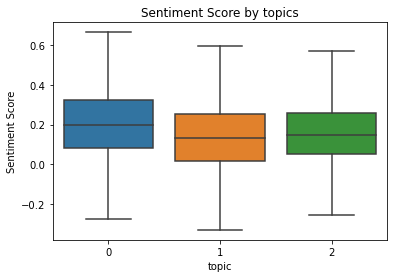

In [44]:
import seaborn as sns
ax = sns.boxplot(x="topic", y="total", data=final,showfliers = False)
ax.set(ylabel="Sentiment Score",title="Sentiment Score by topics")

## Most common positive/negative words

In [45]:
def sort_pn(df):
    positive=df.p_word[df['label']==1] #positive words in positive post
    negative=df.n_word[df['label']==-1] #negative words in negative post
    return positive,negative

In [46]:
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df

In [47]:
positive,negative=sort_pn(final)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,credit,4815
1,like,590
2,good,537
3,interest,396
4,want,383
0,debt,311
1,pay,218
2,no,194
3,credit,122
4,bad,56


In [48]:
positive,negative=sort_pn(a)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,credit,859
1,good,115
2,like,83
3,want,52
4,better,49
0,credit,29
1,no,23
2,debt,22
3,pay,20
4,hurt,11


In [49]:
positive,negative=sort_pn(b)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,credit,1329
1,like,154
2,interest,115
3,want,100
4,good,89
0,debt,185
1,pay,101
2,no,73
3,credit,34
4,emergency,17


In [50]:
positive,negative=sort_pn(c)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,credit,2627
1,like,353
2,good,333
3,interest,236
4,want,231
0,debt,104
1,no,98
2,pay,97
3,credit,59
4,bad,40


## Word Frequency splitted by sentiment

In [51]:
from nltk.corpus import stopwords
#nltk.download("stopwords") #uncomment it when run it for the first time
stop_words = set(stopwords.words("english"))

stop_words.update({'would','k','im','could','also',
                   'amp','much','one','like','get',
                   'since','etc','got','always',
                   'know','thing','really','dont',
                   'find','even','go','time','need','want'
                  })
def remove_stopwords(text):
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

final['text']=final['text'].apply(lambda x: remove_stopwords(x))

In [52]:
from nltk.util import ngrams
def count_2gram(text):
    all_words = list(itertools.chain(*text.str.split()))
    es2grams = ngrams(all_words, 2)
    counts = collections.Counter(es2grams)
    count_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])
    dictionary2 = [' '.join(tup) for tup in count_df.words]
    count_df.words=dictionary2

    return count_df

In [53]:
def pn_freq(df):
    count_p=count_2gram(df['text'][df['label']>0.109797]) #>0.109797 #==1
    count_n=count_2gram(df['text'][df['label']<-0.001208]) #<-0.001208 #==-1
    return count_p,count_n

p,n=pn_freq(final)
p.head(10),n.head(10)

(           words  count
 0    credit card   2442
 1   credit score   1401
 2   credit cards    639
 3       I credit    380
 4      My credit    366
 5          I pay    276
 6   credit union    275
 7      card debt    252
 8  credit report    239
 9   credit card.    230,
            words  count
 0    credit card    387
 1   credit score    119
 2      card debt     91
 3          I pay     88
 4   credit cards     64
 5       I credit     56
 6      My credit     37
 7     card debt.     37
 8  credit report     36
 9     card debt,     34)

In [54]:
p,n=pn_freq(final[final.topic==0])
p.head(10),n.head(10)

(           words  count
 0   credit score    858
 1    credit card    190
 2  credit score.    144
 3      My credit    140
 4       I credit     78
 5  credit score,     76
 6  credit score?     72
 7    good credit     51
 8  affect credit     47
 9        score I     41,
            words  count
 0   credit score     81
 1    credit card     24
 2  credit score.     21
 3      My credit     13
 4  credit score,     12
 5  credit score?     11
 6    hurt credit     10
 7          I pay      8
 8  affect credit      7
 9       I credit      7)

In [55]:
p,n=pn_freq(final[final.topic==1])
p.head(10),n.head(10)

(          words  count
 0   credit card   1765
 1     card debt    217
 2  credit score    194
 3  credit card.    176
 4      I credit    145
 5        card I    142
 6  credit card,    127
 7         I pay    106
 8    pay credit    102
 9         I use     82,
           words  count
 0   credit card    328
 1     card debt     87
 2         I pay     39
 3    card debt.     37
 4    card debt,     34
 5    pay credit     26
 6  credit card.     24
 7        card I     22
 8       debt. I     22
 9  credit score     20)

In [56]:
p,n=pn_freq(final[final.topic==2])
p.head(10),n.head(10)

(           words  count
 0   credit cards    525
 1    credit card    487
 2   credit score    349
 3   credit union    250
 4  credit report    208
 5      My credit    168
 6       I credit    157
 7  credit cards,    134
 8          I pay    134
 9        I don’t    129,
             words  count
 0    credit cards     51
 1           I pay     41
 2     credit card     35
 3   credit report     33
 4        I credit     30
 5        credit I     19
 6    credit union     19
 7    credit score     18
 8  credit history     15
 9      bad credit     14)

## Topic Modeling after sentiment splitting

In [57]:
final.total.describe()

count    5988.000000
mean        0.181387
std         0.304169
min        -2.149425
25%         0.046844
50%         0.150716
75%         0.269358
max         6.692308
Name: total, dtype: float64

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(final['text'][final['label']>0.269358]) #positive
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,000,000 credit,10,100,1000,10k,11,12,15,18,...,work,working,worried,worth,x200b,year,years,years ago,years old,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.203971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
from sklearn.decomposition import NMF

model1=NMF(n_components=4,init="random",random_state=1)
model1.fit(count_df1)

NMF(init='random', n_components=4, random_state=1)

In [60]:
topic2=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10),
                   'Topic 3':top_words(count_df1, model1, 3, 10)})
topic2
# 'Topic 4':top_words(count_df1, model1, 4, 10),
#                     'Topic 5':top_words(count_df1, model1, 5, 10)

,Topic 0,Topic 1,Topic 2,Topic 3
0,years,paid,money,low
1,good,use,balance,good credit
2,account,debt,use,800
3,credit report,month,month,700
4,car,ve,pay,affect credit
5,report,loans,card debt,affect
6,credit union,pay,debt,good
7,union,credit,credit,credit
8,loan,credit cards,credit card,credit score
9,credit,cards,card,score


pay house/loan/car \
retirement \
credit card \
school friend feel

In [61]:
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(final['text'][final['label']<0.046844]) #negative
counts=counts.toarray()
count_df2=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df2

,000,000 credit,10,100,1000,10k,12,15,18,20,...,worried,worry,worth,wrong,www,x200b,year,years,years ago,years old
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.373281,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.164802,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.190462,0.0,0.0,0.135010,0.0,0.0,0.0
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.375697,0.0,0.0,0.0


In [62]:
model2=NMF(n_components=4,init="random",random_state=0)
model2.fit(count_df2)

NMF(init='random', n_components=4, random_state=0)

In [63]:
topic3=pd.DataFrame({'Topic 0':top_words(count_df2, model2, 0, 10),
                   'Topic 1':top_words(count_df2, model2, 1, 10),
                   'Topic 2':top_words(count_df2, model2, 2, 10),
                   'Topic 3':top_words(count_df2, model2, 3, 10)})
topic3

,Topic 0,Topic 1,Topic 2,Topic 3
0,account,recently,debt credit,debt
1,month,dispute,loan,800
2,ve,years,student loans,negative
3,credit cards,agency,loans,things
4,cards,collections,credit,bad
5,car,collection,student,hurt credit
6,credit card,debt,card,hurt
7,pay,credit,credit card,credit
8,card,credit report,card debt,credit score
9,credit,report,debt,score


live home/parent \
credit card and insurance \
retirement \
parent talking

## Find all adj. related to parent

In [64]:
from nltk.tokenize import sent_tokenize
#nltk.download('punkt')
sentence=df['selftext'].apply(lambda x: sent_tokenize(x))

TypeError: expected string or bytes-like object

In [69]:
def extract_parent(sentence_ele):
    L=[]
    for i in sentence_ele:
        if 'credit' in i: 
            L.append(i)
    return L

In [70]:
parent_sentence=sentence.apply(lambda x: extract_parent(x))
' '.join(parent_sentence[3])

NameError: name 'sentence' is not defined

In [99]:
parent_sentence[10]

['I want to start investing in a more structured way so I cashed out everything I had in my investment account and I want to set up everything in a more logical way.Now, of those 11k, 5k will be my emergency fund.']

In [102]:
import nltk
#tokens=nltk.word_tokenize('I am Horrible')
tokens=nltk.word_tokenize(parent_sentence[10][0])
print(tokens)

['I', 'want', 'to', 'start', 'investing', 'in', 'a', 'more', 'structured', 'way', 'so', 'I', 'cashed', 'out', 'everything', 'I', 'had', 'in', 'my', 'investment', 'account', 'and', 'I', 'want', 'to', 'set', 'up', 'everything', 'in', 'a', 'more', 'logical', 'way.Now', ',', 'of', 'those', '11k', ',', '5k', 'will', 'be', 'my', 'emergency', 'fund', '.']


In [103]:
nltk.pos_tag(tokens)

[('I', 'PRP'),
 ('want', 'VBP'),
 ('to', 'TO'),
 ('start', 'VB'),
 ('investing', 'VBG'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('more', 'RBR'),
 ('structured', 'JJ'),
 ('way', 'NN'),
 ('so', 'IN'),
 ('I', 'PRP'),
 ('cashed', 'VBD'),
 ('out', 'RP'),
 ('everything', 'NN'),
 ('I', 'PRP'),
 ('had', 'VBD'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('investment', 'NN'),
 ('account', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('want', 'VBP'),
 ('to', 'TO'),
 ('set', 'VB'),
 ('up', 'RP'),
 ('everything', 'NN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('more', 'RBR'),
 ('logical', 'JJ'),
 ('way.Now', 'NN'),
 (',', ','),
 ('of', 'IN'),
 ('those', 'DT'),
 ('11k', 'CD'),
 (',', ','),
 ('5k', 'CD'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('my', 'PRP$'),
 ('emergency', 'NN'),
 ('fund', 'NN'),
 ('.', '.')]

In [104]:
#nltk.download('averaged_perceptron_tagger')
def extract_adj(sentence_ele):
    adjs=[]
    for i in sentence_ele:
        tokens=nltk.word_tokenize(i)
        df_type=pd.DataFrame(nltk.pos_tag(tokens),columns=['words', 'type'])
        adjs=list(df_type[df_type.type=='JJ'].words)
    return ' '.join(adjs)

In [105]:
adjs=parent_sentence.apply(lambda x: extract_adj(x))

In [106]:
adjs

0                                                       
1                                       easy much little
2                                        previous broken
3                                           incase small
4                                                   sure
                             ...                        
961                                                     
962                                             much 3-6
963                                                     
964                                                     
965    additional available immediate penalty-free ab...
Name: selftext, Length: 966, dtype: object

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(max_df=0.5,min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(adjs)
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,able,additional,big,comfortable,current,decent,extra,financial,free,funded,...,personal,possible,separate,short,single,small,solid,sure,taxable,total
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
962,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
963,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
964,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
from sklearn.decomposition import NMF

model1=NMF(n_components=3,init="random",random_state=0)
model1.fit(count_df1)

NMF(init='random', n_components=3, random_state=0)

In [109]:
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10)})
topic1

,Topic 0,Topic 1,Topic 2
0,financial,free,comfortable
1,personal,short,small
2,decent,long,financial
3,free,monthly,long
4,long,low,little
5,current,separate,monthly
6,solid,taxable,new
7,small,month,able
8,sure,sure,extra
9,good,high,current


In [110]:
# List of all words across rows
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df
count_words(adjs).head(20)

,words,count
0,other,64
1,*,62
2,good,49
3,high,42
4,current,41
5,down,41
6,next,37
7,new,35
8,able,33
9,extra,32


In [111]:
stop_words.update({'i','*','im','’','much'})
adjs=adjs.apply(lambda x: remove_stopwords(x))
count_df=count_words(adjs)
count_df.head(10)

,words,count
0,good,49
1,high,42
2,current,41
3,next,37
4,new,35
5,able,33
6,extra,32
7,small,28
8,low,28
9,full,28
